In [1]:
install.packages("factoextra", repos = "http://cran.rstudio.com/")
library(factoextra)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘rbibutils’, ‘Deriv’, ‘microbenchmark’, ‘Rdpack’, ‘doBy’, ‘SparseM’, ‘MatrixModels’, ‘minqa’, ‘nloptr’, ‘reformulas’, ‘RcppEigen’, ‘lazyeval’, ‘carData’, ‘Formula’, ‘pbkrtest’, ‘quantreg’, ‘lme4’, ‘crosstalk’, ‘estimability’, ‘numDeriv’, ‘mvtnorm’, ‘corrplot’, ‘viridis’, ‘car’, ‘DT’, ‘ellipse’, ‘emmeans’, ‘flashClust’, ‘leaps’, ‘multcompView’, ‘scatterplot3d’, ‘ggsci’, ‘cowplot’, ‘ggsignif’, ‘gridExtra’, ‘polynom’, ‘rstatix’, ‘plyr’, ‘abind’, ‘dendextend’, ‘FactoMineR’, ‘ggpubr’, ‘reshape2’, ‘ggrepel’


Loading required package: ggplot2

Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa



In [2]:
library(readxl)
library(dplyr)
library(ggplot2)
library(cluster)   # For clustering algorithms


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [3]:
data <- read_excel("/content/sample_data/Online Retail.xlsx")

head(data)

InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
<chr>,<chr>,<chr>,<dbl>,<dttm>,<dbl>,<dbl>,<chr>
536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850,United Kingdom


In [5]:
head(data, 10)

InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
<chr>,<chr>,<chr>,<dbl>,<dttm>,<dbl>,<dbl>,<chr>
536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850,United Kingdom
536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850,United Kingdom
536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850,United Kingdom
536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850,United Kingdom


In [6]:
summary(data)

  InvoiceNo          StockCode         Description           Quantity        
 Length:541909      Length:541909      Length:541909      Min.   :-80995.00  
 Class :character   Class :character   Class :character   1st Qu.:     1.00  
 Mode  :character   Mode  :character   Mode  :character   Median :     3.00  
                                                          Mean   :     9.55  
                                                          3rd Qu.:    10.00  
                                                          Max.   : 80995.00  
                                                                             
  InvoiceDate                       UnitPrice           CustomerID    
 Min.   :2010-12-01 08:26:00.00   Min.   :-11062.06   Min.   :12346   
 1st Qu.:2011-03-28 11:34:00.00   1st Qu.:     1.25   1st Qu.:13953   
 Median :2011-07-19 17:17:00.00   Median :     2.08   Median :15152   
 Mean   :2011-07-04 13:34:57.16   Mean   :     4.61   Mean   :15288   
 3rd Qu.:2011-10-19 1

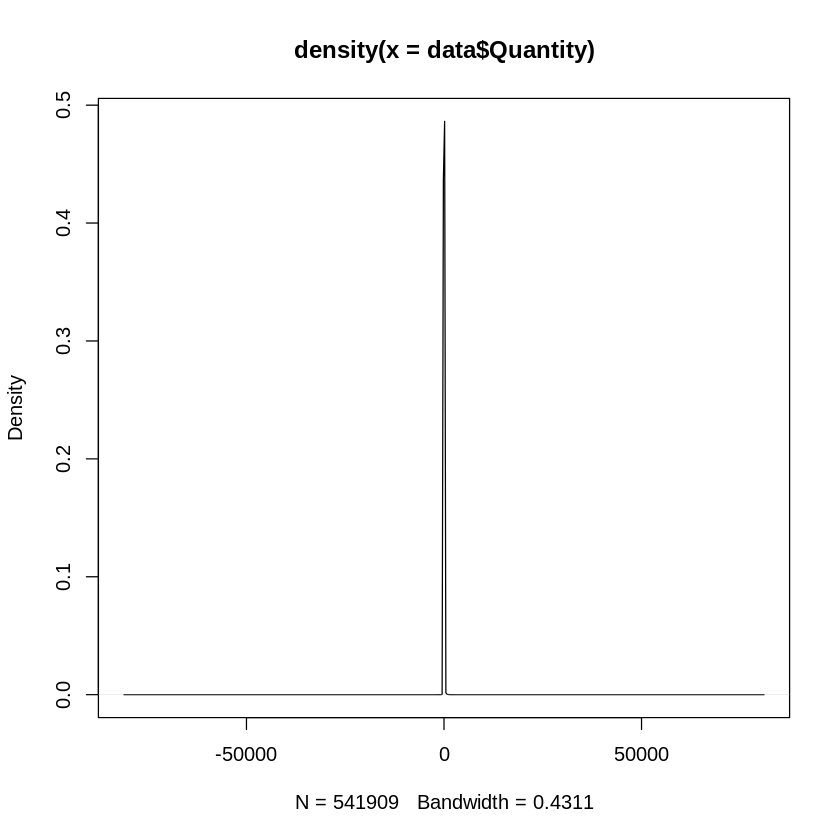

In [7]:
plot(density(data$Quantity))

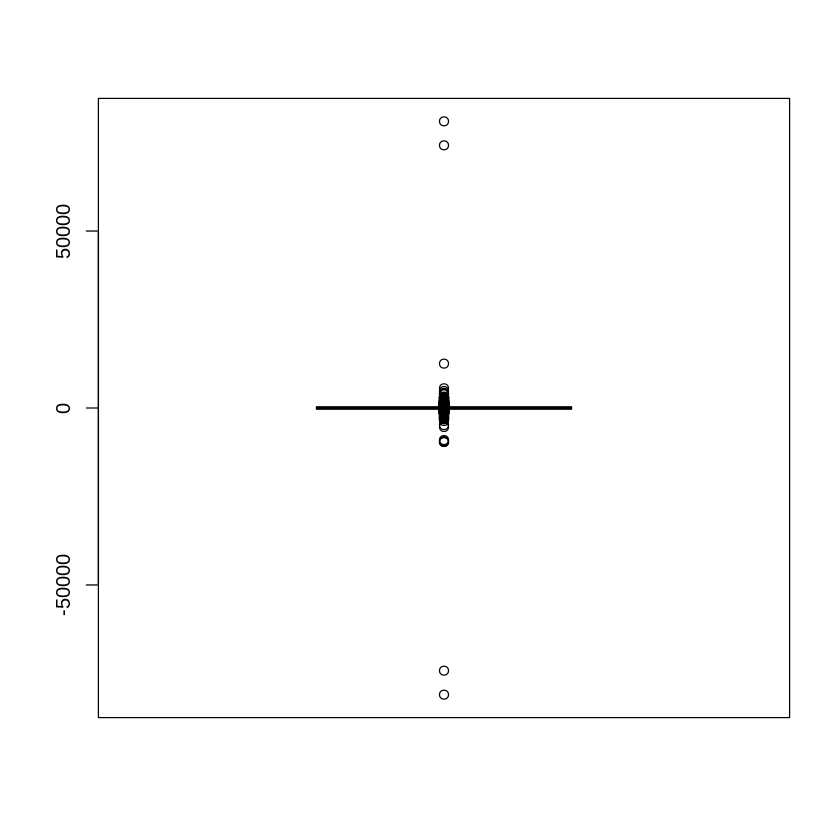

In [13]:
boxplot(data$Quantity)

In [4]:
plot_hist_quantity <- function(data, col, x, y) {
  qty <- data[[col]][data[[col]] >= x & data[[col]] <= y]


  hist(qty,
      probability = TRUE,
      breaks = seq(x, y, by = 1),
      main = cat("Histogram of ", col),
      xlab = col,
      col = "lightgray",
      border = "black")


  abline(v = mean(qty), col = "red", lwd = 3)


  lines(density(qty), col = "green", lwd = 3)
}

Histogram of  Quantity

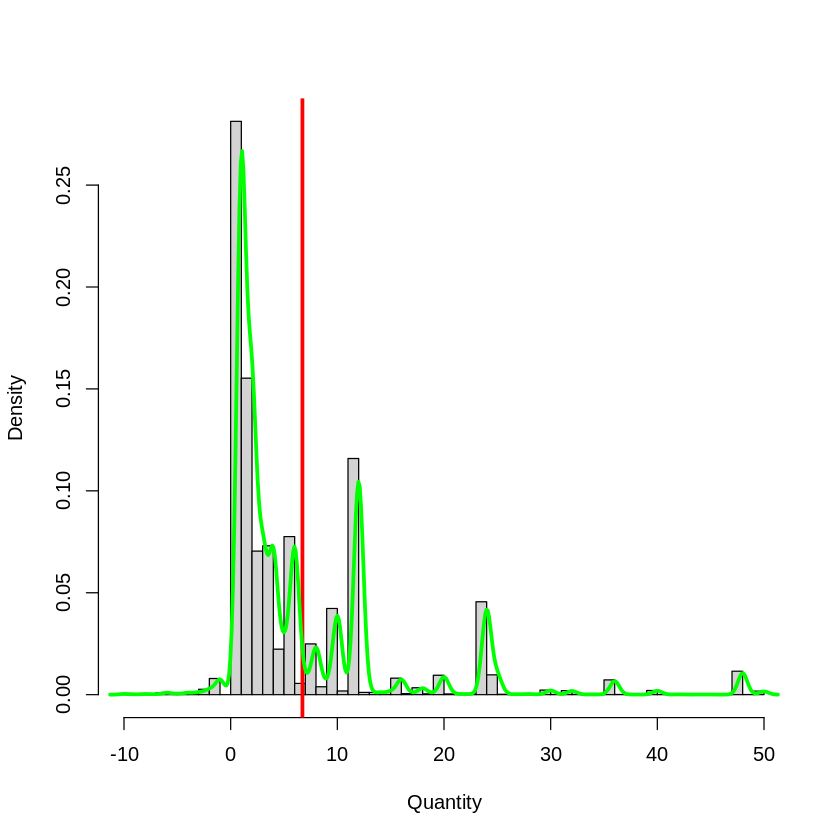

In [8]:
plot_hist_quantity(data, "Quantity", -10, 50)

In [9]:
data_clean <- data %>%
  filter(!grepl("^C", InvoiceNo)) %>%
  filter(!is.na(StockCode) & !is.na(Quantity) & !is.na(UnitPrice))

# Convert InvoiceDate to POSIXct
data_clean$InvoiceDate <- as.POSIXct(data_clean$InvoiceDate, format = "%Y-%m-%d %H:%M:%S")


head(data_clean, 10)

InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
<chr>,<chr>,<chr>,<dbl>,<dttm>,<dbl>,<dbl>,<chr>
536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850,United Kingdom
536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850,United Kingdom
536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850,United Kingdom
536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850,United Kingdom


In [10]:
nrow(data)

[1] 541909

In [11]:
nrow(data_clean)

[1] 532621

In [12]:
min(data_clean$Quantity)

[1] -9600

In [18]:
negative_transactions <- data_clean %>% filter(Quantity < 0)
head(negative_transactions)

InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
<chr>,<chr>,<chr>,<dbl>,<dttm>,<dbl>,<dbl>,<chr>
536589,21777,NA,-10,2010-12-01 16:50:00,0,NA,United Kingdom
536764,84952C,NA,-38,2010-12-02 14:42:00,0,NA,United Kingdom
536996,22712,NA,-20,2010-12-03 15:30:00,0,NA,United Kingdom
536997,22028,NA,-20,2010-12-03 15:30:00,0,NA,United Kingdom
536998,85067,NA,-6,2010-12-03 15:30:00,0,NA,United Kingdom
537000,21414,NA,-22,2010-12-03 15:32:00,0,NA,United Kingdom


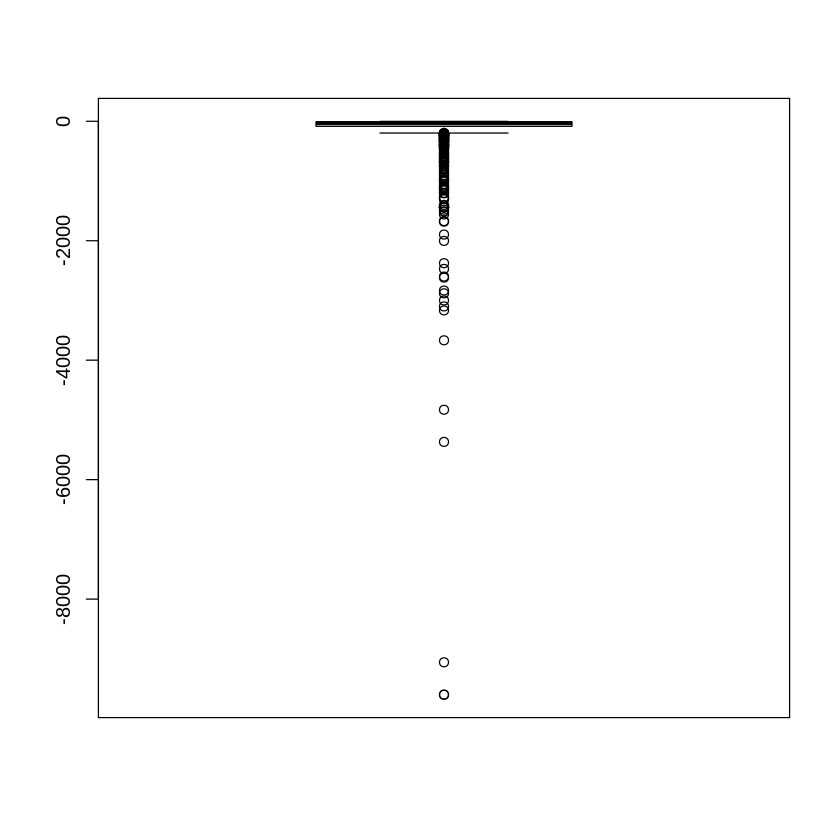

In [19]:
boxplot(negative_transactions$Quantity)

In [20]:
head(negative_transactions, 10)

InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
<chr>,<chr>,<chr>,<dbl>,<dttm>,<dbl>,<dbl>,<chr>
536589,21777,NA,-10,2010-12-01 16:50:00,0,NA,United Kingdom
536764,84952C,NA,-38,2010-12-02 14:42:00,0,NA,United Kingdom
536996,22712,NA,-20,2010-12-03 15:30:00,0,NA,United Kingdom
536997,22028,NA,-20,2010-12-03 15:30:00,0,NA,United Kingdom
536998,85067,NA,-6,2010-12-03 15:30:00,0,NA,United Kingdom
537000,21414,NA,-22,2010-12-03 15:32:00,0,NA,United Kingdom
537001,21653,NA,-6,2010-12-03 15:33:00,0,NA,United Kingdom
537003,85126,NA,-2,2010-12-03 15:33:00,0,NA,United Kingdom
537004,21814,NA,-30,2010-12-03 15:34:00,0,NA,United Kingdom


In [21]:
min(data_clean$UnitPrice)

[1] -11062.06

In [ ]:
summary(data_clean)

  InvoiceNo          StockCode         Description           Quantity       
 Length:532621      Length:532621      Length:532621      Min.   :-9600.00  
 Class :character   Class :character   Class :character   1st Qu.:    1.00  
 Mode  :character   Mode  :character   Mode  :character   Median :    3.00  
                                                          Mean   :   10.24  
                                                          3rd Qu.:   10.00  
                                                          Max.   :80995.00  
                                                                            
  InvoiceDate                      UnitPrice            CustomerID    
 Min.   :2010-12-01 08:26:00.0   Min.   :-11062.060   Min.   :12346   
 1st Qu.:2011-03-28 12:13:00.0   1st Qu.:     1.250   1st Qu.:13969   
 Median :2011-07-20 11:54:00.0   Median :     2.080   Median :15159   
 Mean   :2011-07-04 17:06:10.7   Mean   :     3.848   Mean   :15294   
 3rd Qu.:2011-10-19 12:21:00.

In [22]:
data_clean <- data_clean %>%
  filter(Quantity >= 0, UnitPrice >= 0)

In [23]:
nrow(data_clean)

[1] 531283

In [24]:
summary(data_clean)

  InvoiceNo          StockCode         Description           Quantity       
 Length:531283      Length:531283      Length:531283      Min.   :    1.00  
 Class :character   Class :character   Class :character   1st Qu.:    1.00  
 Mode  :character   Mode  :character   Mode  :character   Median :    3.00  
                                                          Mean   :   10.66  
                                                          3rd Qu.:   10.00  
                                                          Max.   :80995.00  
                                                                            
  InvoiceDate                       UnitPrice           CustomerID    
 Min.   :2010-12-01 08:26:00.00   Min.   :    0.000   Min.   :12346   
 1st Qu.:2011-03-28 11:59:00.00   1st Qu.:    1.250   1st Qu.:13969   
 Median :2011-07-20 12:01:00.00   Median :    2.080   Median :15159   
 Mean   :2011-07-04 18:15:33.18   Mean   :    3.899   Mean   :15294   
 3rd Qu.:2011-10-19 12:35:00.

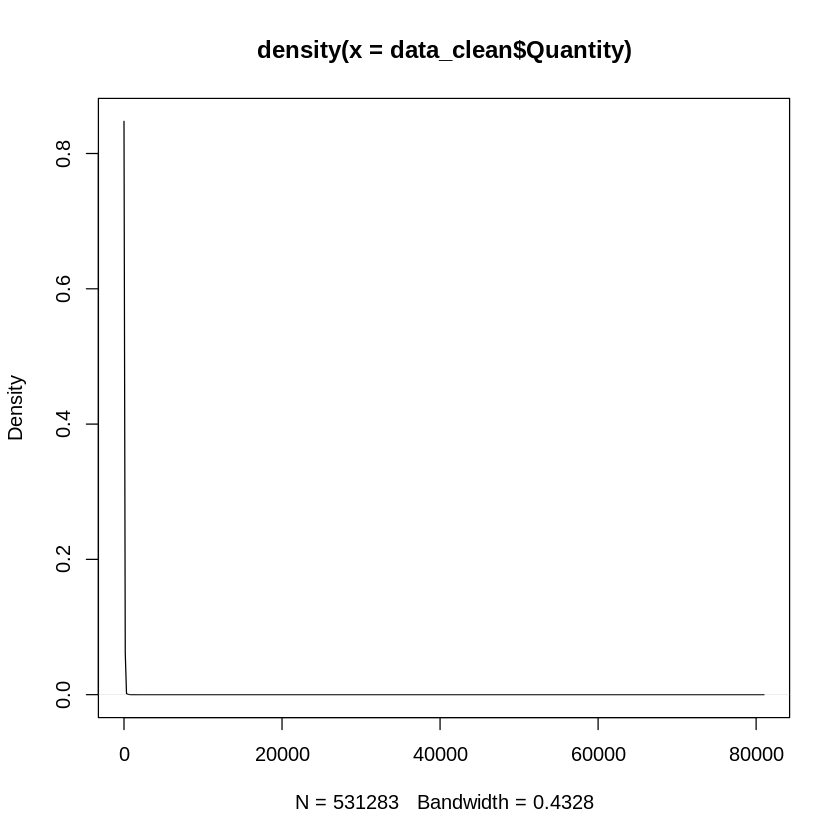

In [25]:
plot(density(data_clean$Quantity))

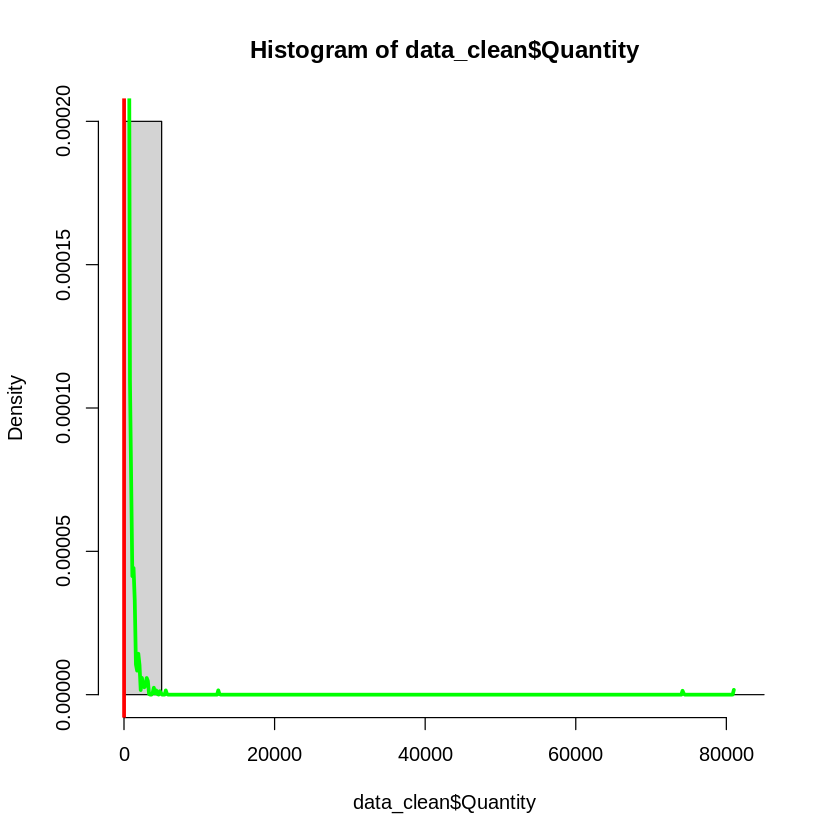

In [ ]:
hist(data_clean$Quantity, probability = TRUE)
abline(v = mean(data_clean$Quantity), col='red', lwd = 3)
lines(density(data_clean$Quantity), col = 'green', lwd = 3)

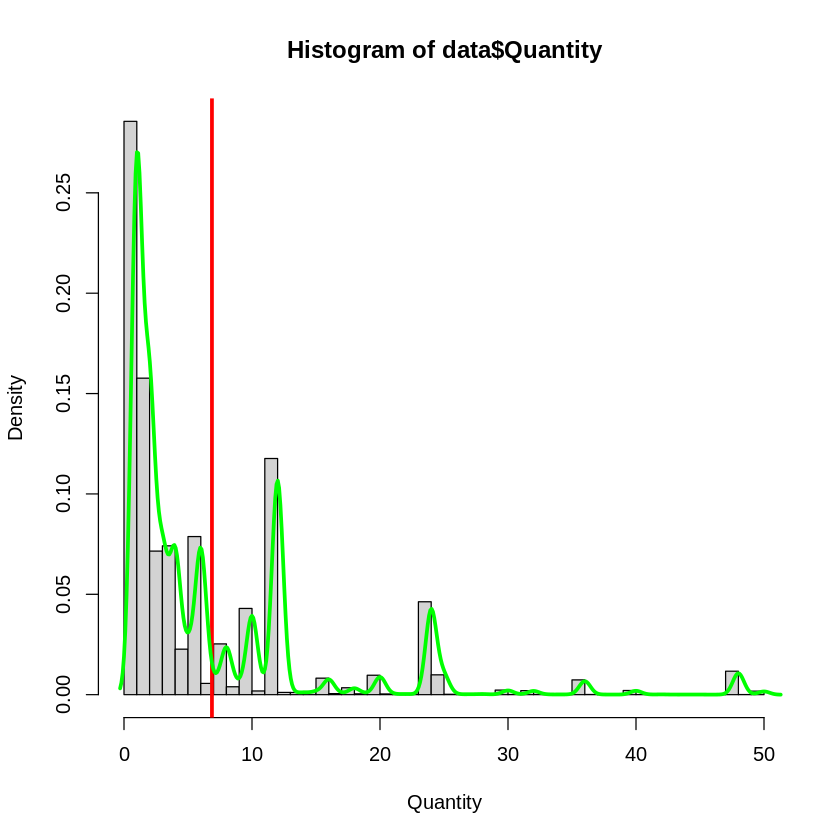

In [26]:
plot_hist_quantity(data_clean, 0, 50)

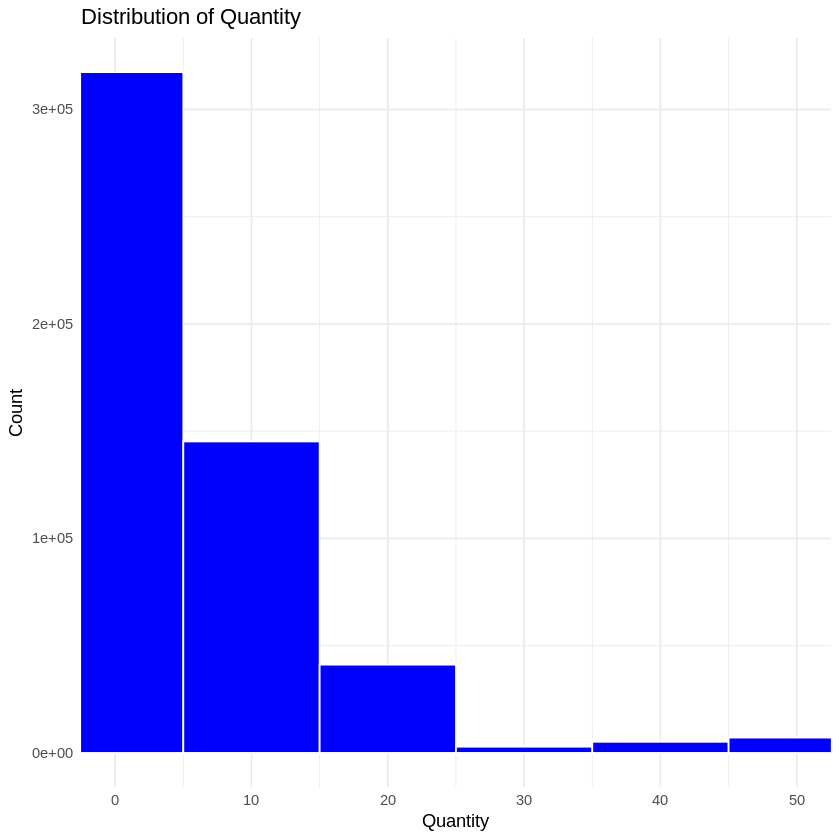

In [ ]:
ggplot(data_clean, aes(x = Quantity)) +
  geom_histogram(binwidth = 10, fill = "blue", color = "white") +
  coord_cartesian(xlim = c(0, 50)) +
  labs(title = "Distribution of Quantity", x = "Quantity", y = "Count") +
  theme_minimal()

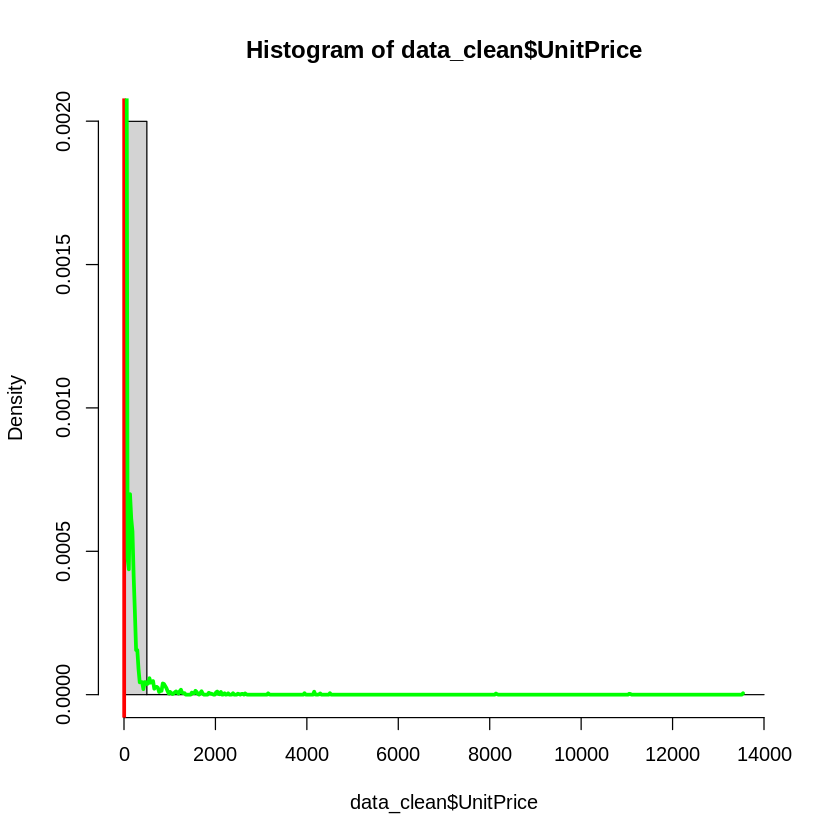

In [ ]:
hist(data_clean$UnitPrice, probability = TRUE)
abline(v = mean(data_clean$UnitPrice), col='red', lwd = 3)
lines(density(data_clean$UnitPrice), col = 'green', lwd = 3)

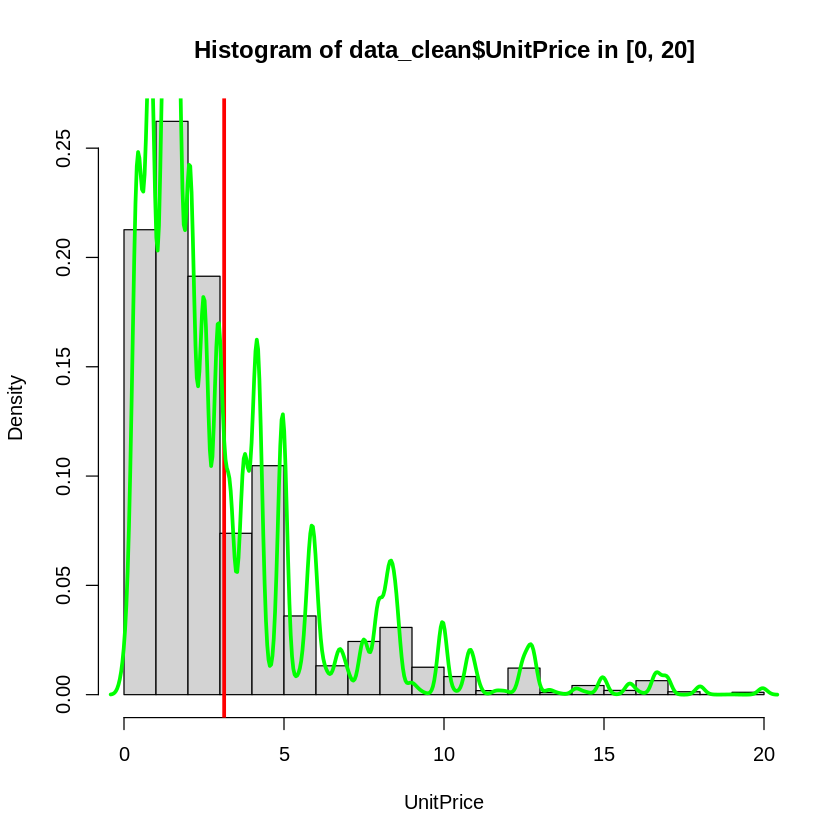

In [27]:
uprice_0_100 <- data_clean$UnitPrice[data_clean$UnitPrice >= 0 & data_clean$UnitPrice <= 20]


hist(uprice_0_100,
     probability = TRUE,
     breaks = seq(0, 20, by = 1),
     main = "Histogram of data_clean$UnitPrice in [0, 20]",
     xlab = "UnitPrice",
     col = "lightgray",
     border = "black")


abline(v = mean(uprice_0_100), col = "red", lwd = 3)


lines(density(uprice_0_100), col = "green", lwd = 3)

In [28]:
summary(data_clean)

  InvoiceNo          StockCode         Description           Quantity       
 Length:531283      Length:531283      Length:531283      Min.   :    1.00  
 Class :character   Class :character   Class :character   1st Qu.:    1.00  
 Mode  :character   Mode  :character   Mode  :character   Median :    3.00  
                                                          Mean   :   10.66  
                                                          3rd Qu.:   10.00  
                                                          Max.   :80995.00  
                                                                            
  InvoiceDate                       UnitPrice           CustomerID    
 Min.   :2010-12-01 08:26:00.00   Min.   :    0.000   Min.   :12346   
 1st Qu.:2011-03-28 11:59:00.00   1st Qu.:    1.250   1st Qu.:13969   
 Median :2011-07-20 12:01:00.00   Median :    2.080   Median :15159   
 Mean   :2011-07-04 18:15:33.18   Mean   :    3.899   Mean   :15294   
 3rd Qu.:2011-10-19 12:35:00.

In [29]:
product_data <- data_clean %>%
  group_by(StockCode, Description) %>%
  summarise(
    total_quantity   = sum(Quantity, na.rm = TRUE),
    avg_unit_price   = mean(UnitPrice, na.rm = TRUE),
    total_revenue    = sum(Quantity * UnitPrice, na.rm = TRUE),
    transaction_count = n()
  ) %>%
  ungroup()

head(product_data)

`summarise()` has grouped output by 'StockCode'. You can override using the
`.groups` argument.


StockCode,Description,total_quantity,avg_unit_price,total_revenue,transaction_count
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<int>
10002,INFLATABLE POLITICAL GLOBE,860,1.0866197,759.89,71
10002,NA,180,0.0000000,0.00,1
10080,GROOVY CACTUS INFLATABLE,303,0.4109091,119.09,22
10080,check,22,0.0000000,0.00,1
10080,NA,170,0.0000000,0.00,1
10120,DOGGY RUBBER,193,0.2100000,40.53,30


In [30]:
summary(product_data)

  StockCode         Description        total_quantity    avg_unit_price     
 Length:4742        Length:4742        Min.   :    1.0   Min.   :    0.000  
 Class :character   Class :character   1st Qu.:   27.0   1st Qu.:    0.850  
 Mode  :character   Mode  :character   Median :  220.5   Median :    2.035  
                                       Mean   : 1193.8   Mean   :    7.473  
                                       3rd Qu.: 1109.0   3rd Qu.:    4.139  
                                       Max.   :80995.0   Max.   :11062.060  
 total_revenue       transaction_count
 Min.   :     0.00   Min.   :   1     
 1st Qu.:    40.83   1st Qu.:   5     
 Median :   429.86   Median :  41     
 Mean   :  2249.41   Mean   : 112     
 3rd Qu.:  1771.82   3rd Qu.: 140     
 Max.   :206248.77   Max.   :2260     

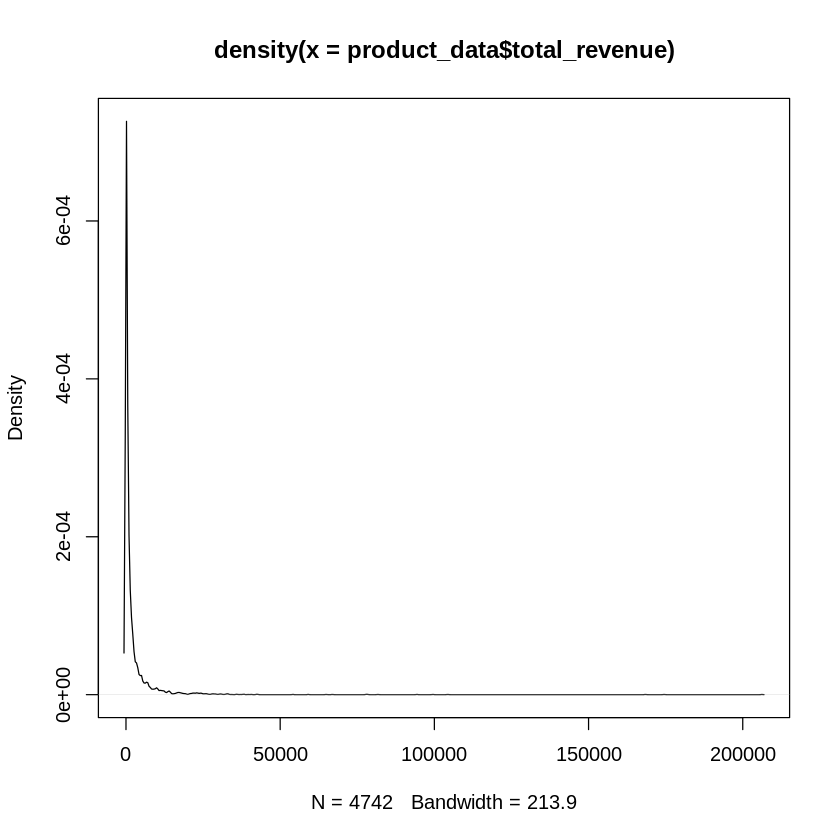

In [31]:
plot(density(product_data$total_revenue))

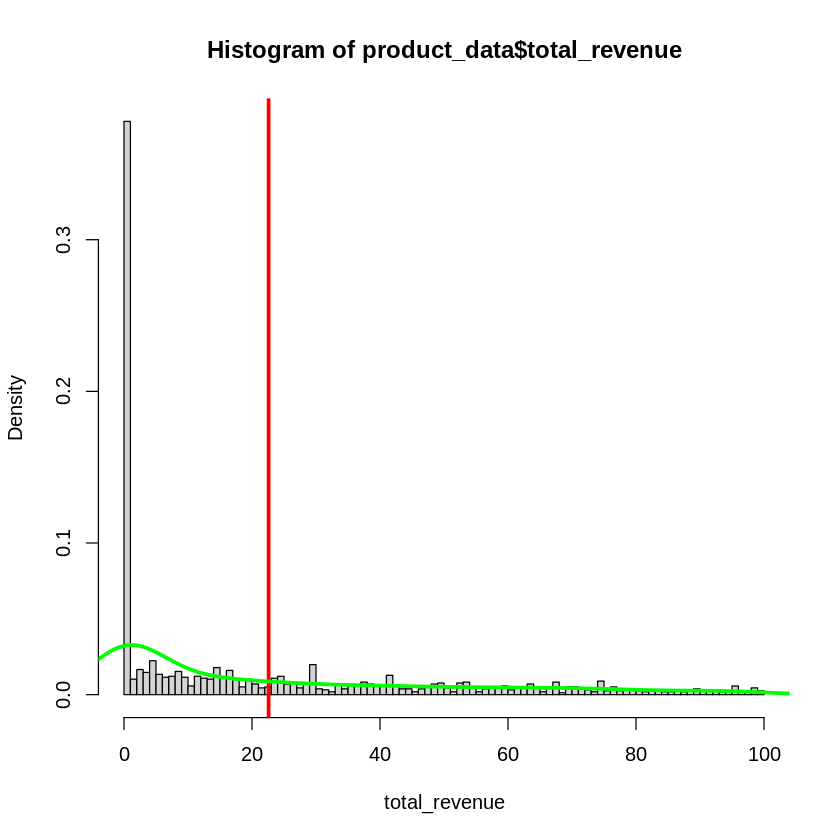

In [35]:
qty <- product_data$total_revenue[product_data$total_revenue >= 0 & product_data$total_revenue <= 100]


hist(qty,
    probability = TRUE,
    breaks = seq(0, 100, by = 1),
    main = "Histogram of product_data$total_revenue",
    xlab = "total_revenue",
    col = "lightgray",
    border = "black")


abline(v = mean(qty), col = "red", lwd = 3)


lines(density(qty), col = "green", lwd = 3)

In [ ]:
features <- product_data %>%
  select(total_quantity, avg_unit_price, total_revenue, transaction_count)

scaled_features <- scale(features)

In [ ]:
head(scaled_features, 10)

total_quantity,avg_unit_price,total_revenue,transaction_count
-0.10320017,-0.03369985,-0.2054134,-0.22305310
-0.31343694,-0.03943361,-0.3102069,-0.60352519
-0.27540882,-0.03726537,-0.2937836,-0.48938356
-0.36228607,-0.03943361,-0.3102069,-0.60352519
-0.31652866,-0.03943361,-0.3102069,-0.60352519
-0.30941771,-0.03832550,-0.3046175,-0.44590104
-0.36754199,-0.03600376,-0.3097587,-0.59265456
-0.36414110,-0.03721740,-0.3092801,-0.58178393
-0.36383193,-0.03721740,-0.3092222,-0.58721924
0.03159869,-0.03489734,-0.1730124,-0.09804085


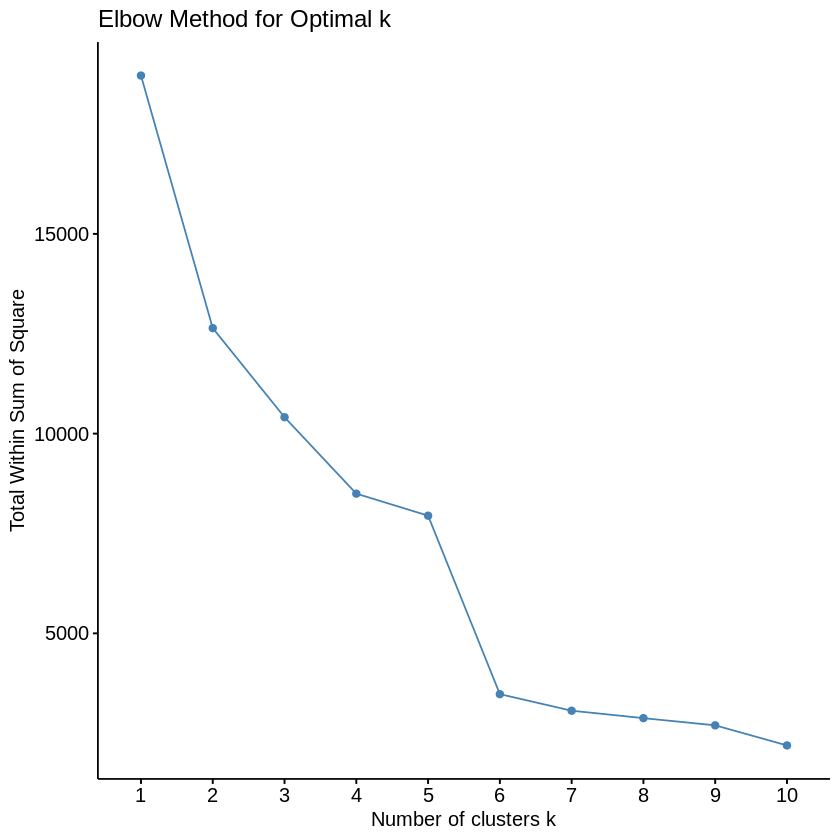

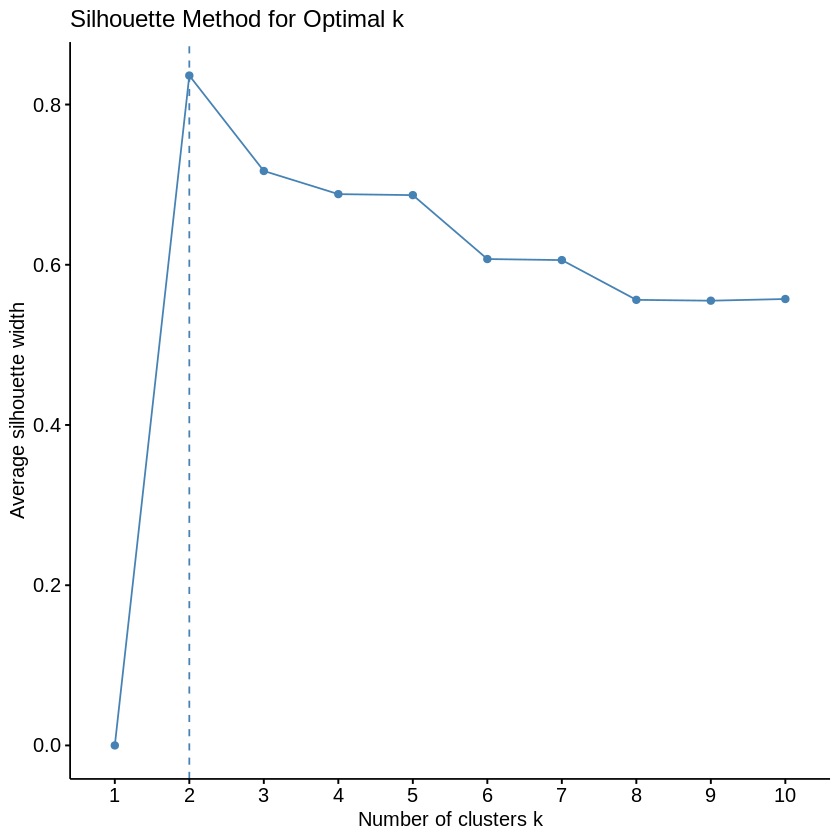

In [ ]:
fviz_nbclust(scaled_features, kmeans, method = "wss") +
  labs(title = "Elbow Method for Optimal k")


fviz_nbclust(scaled_features, kmeans, method = "silhouette") +
  labs(title = "Silhouette Method for Optimal k")

In [ ]:
set.seed(123)
k <- 4
kmeans_result <- kmeans(scaled_features, centers = k, nstart = 25)


product_data$cluster <- factor(kmeans_result$cluster)


head(product_data, 10)


StockCode,Description,total_quantity,avg_unit_price,total_revenue,transaction_count,cluster
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<int>,<fct>
10002,INFLATABLE POLITICAL GLOBE,860,1.0866197,759.89,71,4
10002,NA,180,0.0000000,0.00,1,4
10080,GROOVY CACTUS INFLATABLE,303,0.4109091,119.09,22,4
10080,check,22,0.0000000,0.00,1,4
10080,NA,170,0.0000000,0.00,1,4
10120,DOGGY RUBBER,193,0.2100000,40.53,30,4
10123C,HEARTS WRAPPING TAPE,5,0.6500000,3.25,3,4
10124A,SPOTS ON RED BOOKCOVER TAPE,16,0.4200000,6.72,5,4
10124G,ARMY CAMO BOOKCOVER TAPE,17,0.4200000,7.14,4,4


Too few points to calculate an ellipse


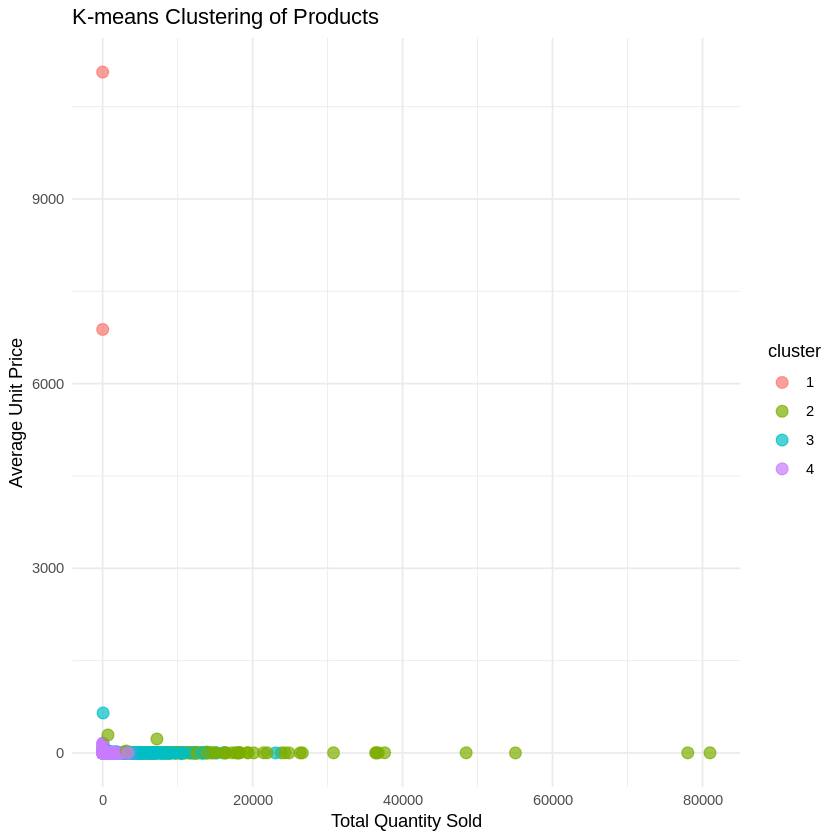

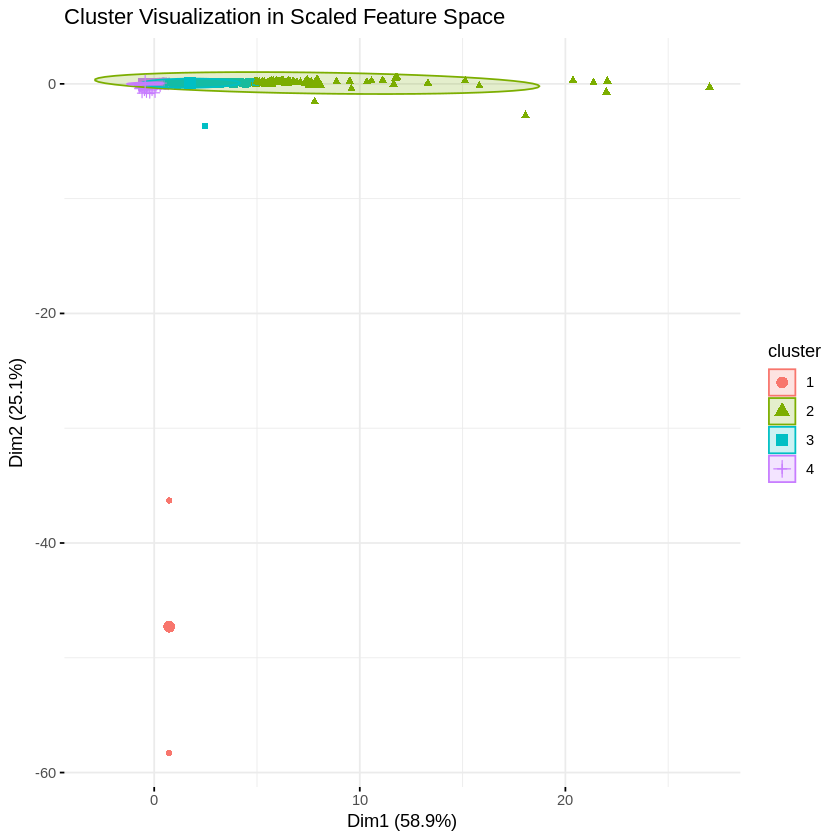

In [ ]:

ggplot(product_data, aes(x = total_quantity, y = avg_unit_price, color = cluster)) +
  geom_point(alpha = 0.7, size = 3) +
  labs(title = "K-means Clustering of Products",
       x = "Total Quantity Sold",
       y = "Average Unit Price") +
  theme_minimal()

# Cluster Visualization using Factoextra in the scaled feature space
fviz_cluster(kmeans_result, data = scaled_features,
             geom = "point",
             ellipse.type = "norm",
             ggtheme = theme_minimal(),
             main = "Cluster Visualization in Scaled Feature Space")


In [ ]:
cluster_summary <- product_data %>%
  group_by(cluster) %>%
  summarise(
    count = n(),
    mean_quantity    = mean(total_quantity),
    mean_unit_price  = mean(avg_unit_price),
    mean_revenue     = mean(total_revenue),
    mean_transaction = mean(transaction_count)
  )

print(cluster_summary)

# A tibble: 4 × 6
  cluster count mean_quantity mean_unit_price mean_revenue mean_transaction
  <fct>   <int>         <dbl>           <dbl>        <dbl>            <dbl>
1 1           2           1.5         8971.         12412.              1.5
2 2          91       15981.             8.84       35611.            950. 
3 3         600        4084.             4.18        7342.            379. 
4 4        4049         434.             3.50         740.             53.7
